In [2]:
import h5py, os, sys
import numpy as np
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import functools
from scipy.misc import imresize
from hangul.read_data import load_data, load_all_labels, load_images

In [3]:
fontsfolder = '/data/hangul/h5s'
fontnames = os.listdir(fontsfolder)

In [8]:
pairs = np.array([['GothicA1-ExtraBold', 'GothicA1-Black'],
                  ['JoseonIlboMyeongjo', 'SourceHanSerifK-Regular'],
                  ['GothicA1-Light', 'NanumGothic'],
                  ['NanumGothicCoding-Bold', 'NanumGothicBold'],
                  ['GothicA1-ExtraLight', 'NanumBarunGothicUltraLight'],
                  ['GothicA1-Regular', 'NanumGothicCoding-Regular'],
                  ['NanumPenScript-Regular', 'NanumPen']])

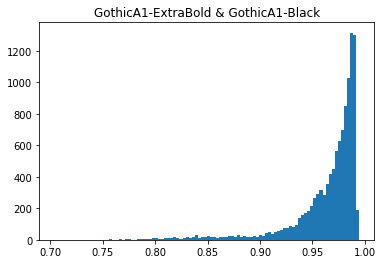

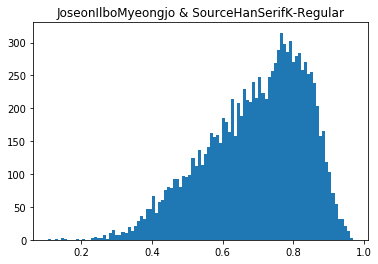

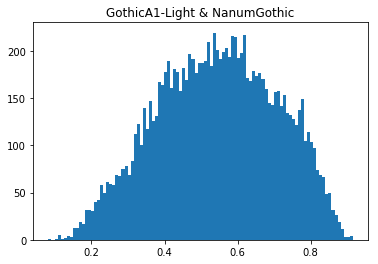

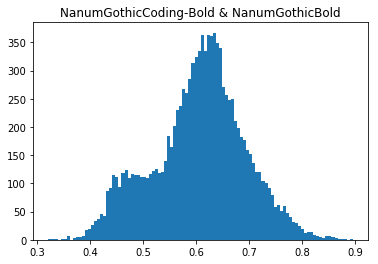

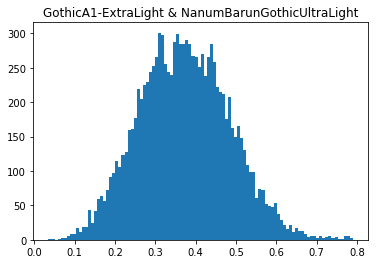

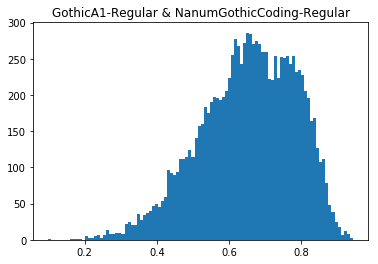

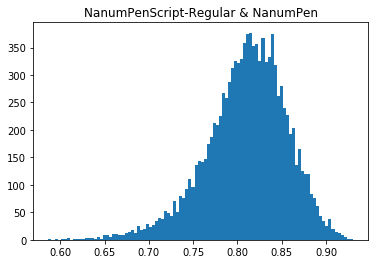

In [9]:
for pair in pairs:
    cc_arr = []
    for font in pair:
        filename = os.path.join(fontsfolder, '{}/{}_24.h5'.format(font, font))
        image, label, initial, medial, final = load_data(filename, median_shape=True)
        X = image.reshape(image.shape[0], -1).astype(float)
        X_hat = X - X.mean(axis=1, keepdims=True)
        X_hat = X_hat/X_hat.std(axis=1, keepdims=True)
        cc_arr.append(X_hat)
    cc = (cc_arr[0]*cc_arr[1]).mean(axis=1)
    plt.figure()
    plt.hist(cc, bins=100)
    plt.title('{} & {}'.format(pair[0], pair[1]))